In [1]:
# !pip install -U scikit-fuzzy

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from scipy.integrate import quad
from scipy import integrate
from math import pi, sqrt, exp
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

In [3]:
data = pd.read_csv('./generic_fuzzy/bloodpressure_sodium_age.csv')
data.head(5)

,bloodpressure,sodium,age
0,152.069798,4.410849,73.820262
1,136.302391,2.984810,67.000786
2,143.984346,2.346063,69.893690
3,156.454474,3.671327,76.204466
4,151.154654,2.530366,74.337790


In [4]:
from generic_fuzzy.fuzzy_utils import GenericFuzzy

num_fuzzy_sets = 6
num_intervals = num_fuzzy_sets-1
# data.columns
generic_fuzzy = GenericFuzzy(
  data=data,
  c=0.5,
  num_fuzzy_sets=num_fuzzy_sets,
  num_intervals=num_intervals,
  target='bloodpressure'
)

generic_fuzzy.apply_fuzzy_sets_to_variables()

,bloodpressure,sodium,age
0,4,3,4
1,3,2,3
2,3,2,3
3,4,3,4
4,4,2,4
...,...,...,...
4995,2,1,2
4996,3,3,3
4997,3,3,3
4998,3,3,3


In [5]:
generic_fuzzy.data.columns

Index(['bloodpressure', 'sodium', 'age'], dtype='object')

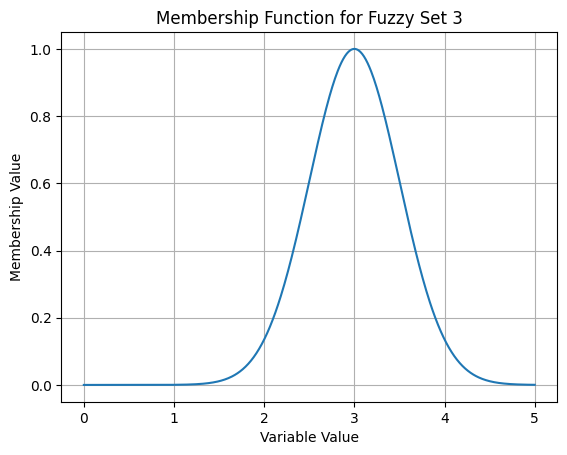

In [6]:
# Generate a range of x values
x_values = np.linspace(generic_fuzzy.data['sodium'].min(), generic_fuzzy.data['sodium'].max(), 500)

# Select the fuzzy set index i to plot
i = 3  # For example, plot the membership function for the third fuzzy set

# Compute membership values
membership_values = generic_fuzzy.membership_function('sodium', i, x_values)

# Plotting
plt.plot(x_values, membership_values)
plt.title(f'Membership Function for Fuzzy Set {i}')
plt.xlabel('Variable Value')
plt.ylabel('Membership Value')
plt.grid(True)
plt.show()

In [7]:
generic_fuzzy.generate_rules()
generic_fuzzy.format_rules()

['sodium', '1']
['sodium', '2']
['age', '1']
['sodium', '1']
['sodium', '2']
['age', '2']
['sodium', '3']
['sodium', '4']
['age', '3']
['sodium', '3']
['sodium', '4']
['age', '4']
['bloodpressure', '1']
['bloodpressure', '1']
['bloodpressure', '1']
['bloodpressure', '2']
['bloodpressure', '2']
['bloodpressure', '2']
['bloodpressure', '3']
['bloodpressure', '3']
['bloodpressure', '3']
['bloodpressure', '4']
['bloodpressure', '4']
['bloodpressure', '4']
['age', '1']
['sodium', '1']
['age', '1']
['sodium', '2']
['age', '1']
['sodium', '3']
['age', '2']
['sodium', '1']
['age', '2']
['sodium', '2']
['age', '2']
['sodium', '3']
['age', '2']
['sodium', '4']
['age', '3']
['sodium', '1']
['age', '3']
['sodium', '2']
['age', '3']
['sodium', '3']
['sodium', '4']
['age', '3']
['age', '4']
['sodium', '3']
['age', '4']
['sodium', '4']
['bloodpressure', '1']
['bloodpressure', '1']
['bloodpressure', '1']
['bloodpressure', '2']
['bloodpressure', '2']
['bloodpressure', '2']
['bloodpressure', '2']
['bloo

In [9]:
generic_fuzzy.rules_with_two_elements

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"{age['1'], sodium['1']}",{bloodpressure['1']},0.0120,0.0786,0.0114,0.950000,12.086514,0.010457,18.428000,0.928404
48,"{sodium['2'], age['1']}",{bloodpressure['1']},0.0334,0.0786,0.0332,0.994012,12.646463,0.030575,153.873800,0.952748
52,"{age['1'], sodium['3']}",{bloodpressure['1']},0.0212,0.0786,0.0190,0.896226,11.402372,0.017334,8.878945,0.932059
58,"{sodium['1'], age['2']}",{bloodpressure['2']},0.0514,0.4690,0.0472,0.918288,1.957970,0.023093,6.498429,0.515778
64,"{sodium['2'], age['2']}",{bloodpressure['2']},0.2058,0.4690,0.1978,0.961127,2.049312,0.101280,13.659975,0.644713
71,"{age['2'], sodium['3']}",{bloodpressure['2']},0.1620,0.4690,0.1554,0.959259,2.045329,0.079422,13.033636,0.609882
75,"{sodium['4'], age['2']}",{bloodpressure['2']},0.0298,0.4690,0.0250,0.838926,1.788755,0.011024,3.296625,0.454496
78,"{age['3'], sodium['1']}",{bloodpressure['3']},0.0240,0.3988,0.0168,0.700000,1.755266,0.007229,2.004000,0.440867
82,"{sodium['2'], age['3']}",{bloodpressure['3']},0.1494,0.3988,0.1258,0.842035,2.111421,0.066219,3.805902,0.618840
87,"{age['3'], sodium['3']}",{bloodpressure['3']},0.1964,0.3988,0.1858,0.946029,2.372188,0.107476,11.139215,0.719821


In [10]:

# Extracting an example
antecedents = list(generic_fuzzy.rules_with_two_elements.iloc[0]['antecedents'])
consequents = list(generic_fuzzy.rules_with_two_elements.iloc[0]['consequents'])

# First antecedent as a normal text string
antecedent_text = antecedents[0]
print(antecedent_text)
type(antecedent_text)

age['1']


str

In [ ]:
min_sodium = data['sodium'].min()
min_age = data['age'].min()
min_bloodpressure = data['bloodpressure'].min()

max_sodium = data['sodium'].max()
max_age = data['age'].max()
max_bloodpressure = data['bloodpressure'].max()

num_points = 100
step_sodium = (max_sodium - min_sodium)/num_points
step_age = (max_age - min_age)/num_points
step_bloodpressure = (max_bloodpressure - min_bloodpressure)/num_points


sodium = ctrl.Antecedent(np.arange(min_sodium, max_sodium  , step_sodium), 'sodium')
age = ctrl.Antecedent(np.arange(min_age, max_age  , step_age), 'age')
bloodpressure = ctrl.Consequent(np.arange(min_bloodpressure, max_bloodpressure  , step_bloodpressure), 'bloodpressure')

c = 0.2

#sodium
for i in range(num_fuzzy_sets):
  string = str(i)
  if i == 0:
    point_1 = partition(data['sodium'], i)
    point_2 = partition(data['sodium'], i + 1)
    sodium[string] = fuzz.gaussmf(sodium.universe, point_1, c*(point_2 - point_1))
  elif i == num_intervals:
    point_1 = partition(data['sodium'], i - 1)
    point_2 = partition(data['sodium'], i )
    sodium[string] = fuzz.gaussmf(sodium.universe, point_2, c*(point_2 - point_1))
  else:
    point_1 = partition(data['sodium'], i - 1)
    point_2 = partition(data['sodium'], i)
    point_3 = partition(data['sodium'], i + 1)
    sodium[string] = fuzz.gaussmf(sodium.universe, point_2, c*(point_3 - point_2))

#age
for i in range(num_fuzzy_sets):
  string = str(i)
  if i == 0:
    point_1 = partition(data['age'], i)
    point_2 = partition(data['age'], i + 1)
    age[string] = fuzz.gaussmf(age.universe, point_1, c*(point_2 - point_1))
  elif i == num_intervals:
    point_1 = partition(data['age'], i - 1)
    point_2 = partition(data['age'], i )
    age[string] = fuzz.gaussmf(age.universe, point_2, c*(point_2 - point_1))
  else:
    point_1 = partition(data['age'], i - 1)
    point_2 = partition(data['age'], i)
    point_3 = partition(data['age'], i + 1)
    age[string] = fuzz.gaussmf(age.universe, point_2, c*(point_3 - point_1))

#bloodpressure
for i in range(num_fuzzy_sets):
  string = str(i)
  if i == 0:
    point_1 = partition(data['bloodpressure'], i)
    point_2 = partition(data['bloodpressure'], i + 1)
    bloodpressure[string] = fuzz.gaussmf(bloodpressure.universe, point_1, c*(point_2 - point_1))
  elif i == num_intervals:
    point_1 = partition(data['bloodpressure'], i - 1)
    point_2 = partition(data['bloodpressure'], i )
    bloodpressure[string] = fuzz.gaussmf(bloodpressure.universe, point_2, c*(point_2 - point_1))
  else:
    point_1 = partition(data['bloodpressure'], i - 1)
    point_2 = partition(data['bloodpressure'], i)
    point_3 = partition(data['bloodpressure'], i + 1)
    bloodpressure[string] = fuzz.gaussmf(bloodpressure.universe, point_2, c*(point_3 - point_2))

# Define the rules

def parse_fuzzy_reference(reference_str, namespace):
    parts = reference_str.split('[')
    var_name = parts[0]
    # Correctly strip quotes and extra characters
    set_name = parts[1].replace("'", "").replace('"', "").replace("]", "")
    return namespace[var_name][set_name]


# Namespace for fuzzy variables
namespace = {'sodium': sodium, 'age': age, 'bloodpressure': bloodpressure}

# Function to combine conditions with AND
def combine_conditions(conditions):
    combined = conditions[0]
    for cond in conditions[1:]:
        combined &= cond
    return combined

# Define the fuzzy rules
fuzzy_rules = []

# For rules with one element
#for i in range(len(rules_with_one_element)):
 #   antecedents = list(rules_with_one_element.iloc[i]['antecedents'])
 #   consequents = list(rules_with_one_element.iloc[i]['consequents'])
 #   rule = ctrl.Rule(parse_fuzzy_reference(antecedents[0], namespace), parse_fuzzy_reference(consequents[0], namespace))
  #  fuzzy_rules.append(rule)

# For rules with two elements
for i in range(len(rules_with_two_elements)):
    antecedents = list(rules_with_two_elements.iloc[i]['antecedents'])
    consequents = list(rules_with_two_elements.iloc[i]['consequents'])
    antecedent_conditions = [parse_fuzzy_reference(ant, namespace) for ant in antecedents]
    rule = ctrl.Rule(combine_conditions(antecedent_conditions), parse_fuzzy_reference(consequents[0], namespace))
    fuzzy_rules.append(rule)

# For rules with three elements
#for i in range(len(rules_with_three_elements)):
#    antecedents = list(rules_with_three_elements.iloc[i]['antecedents'])
#    consequents = list(rules_with_three_elements.iloc[i]['consequents'])
#    antecedent_conditions = [parse_fuzzy_reference(ant, namespace) for ant in antecedents]
#    rule = ctrl.Rule(combine_conditions(antecedent_conditions), parse_fuzzy_reference(consequents[0], namespace))
#    fuzzy_rules.append(rule)


#rule1 = ctrl.Rule(sodium['medium'] & age['high'], bloodpressure['high'])
#rule2 = ctrl.Rule(proteinuria['high'] & age['high'], bloodpressure['high'])
#rule3 = ctrl.Rule(sodium['low'] & age['low'], bloodpressure['low'])
#rule4 = ctrl.Rule(sodium['low'] & proteinuria['low'], bloodpressure['low'])
#rule5 = ctrl.Rule(sodium['medium'] & age['low'], bloodpressure['low'])
#rule6 = ctrl.Rule(sodium['medium'] & proteinuria['low'], bloodpressure['low'])
#rule7 = ctrl.Rule(proteinuria['low'] & age['low'], bloodpressure['low'])
#rule8 = ctrl.Rule(sodium['low'] & age['medium'], bloodpressure['medium'])
#rule9 = ctrl.Rule(sodium['low'] & age['medium'], bloodpressure['medium'])
#rule10 = ctrl.Rule(sodium['low'] & proteinuria['medium'], bloodpressure['medium'])
#rule11 = ctrl.Rule(sodium['medium'] & age['medium'], bloodpressure['medium'])
#rule12 = ctrl.Rule(sodium['medium'] & proteinuria['medium'], bloodpressure['medium'])
#rule13 = ctrl.Rule(age['medium'] & proteinuria['medium'], bloodpressure['medium'])
#rule14 = ctrl.Rule(age['low'] & proteinuria['low'] & sodium['low'], bloodpressure['medium'])
#rule15 = ctrl.Rule(age['low'] & proteinuria['low'] & sodium['low'], bloodpressure['low'])
#rule16 = ctrl.Rule(age['medium'] & proteinuria['medium'] & sodium['medium'], bloodpressure['medium'])
# Create the control system
#bloodpressure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13,rule14,rule15, rule16])
bloodpressure_ctrl = ctrl.ControlSystem(fuzzy_rules)
# Create a simulation
bloodpressure_simulation = ctrl.ControlSystemSimulation(bloodpressure_ctrl)

# Input values (food quality and service quality)
sodium_value = 4.657088
age_value = 73.820262

# Pass input values to the simulation
bloodpressure_simulation.input['sodium'] = sodium_value
bloodpressure_simulation.input['age'] = age_value
# Calculate the bloodpressure
bloodpressure_simulation.compute()

# Print the result
print("Estimated bloodpressure amount:", bloodpressure_simulation.output['bloodpressure'])

In [ ]:
sodium['1'].view()

In [ ]:
dff = data.copy(deep=True)
dff = dff.to_numpy()
ar = np.zeros(len(df))

for i in range(len(df)):
  sodium_value = dff[i][1]
  age_value = dff[i][2]
  bloodpressure_simulation.input['sodium'] = sodium_value
  bloodpressure_simulation.input['age'] = age_value
  bloodpressure_simulation.compute()
  ar[i] = bloodpressure_simulation.output['bloodpressure']

In [ ]:
for i in range(10):
  plt.plot(dff[i:i+100,0], color = 'r')
  plt.plot(ar[i:i+100], color = 'b')
  plt.title('Reall Values of Blood Pressure')
  plt.xlabel('Index')
  plt.ylabel('Value')
  plt.show()